<a href="https://colab.research.google.com/github/nived02/MultiOmics/blob/main/Aug_23_DH607_HandsOn2_DNA_sequencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install conda

We will install [conda](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) , a command line utility for installing packages and managing python/R environments.

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


We will also install a utility package here that we will use much later in the notebook. You will have to restart your session after you install igv-notebook.

In [2]:
!pip install igv-notebook
!pip install multiqc

  Using cached multiqc-1.24.1-py3-none-any.whl.metadata (45 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached humanize-4.10.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached importlib_metadata-8.4.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached plotly-5.23.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached pyaml_env-1.2.1-py3-none-any.whl.metadata (12 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached rich_click-1.8.3-py3-none-any.whl.metadata (7.9 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached spectra-0.0.11-py3-none-any.whl
  Using cached pydantic-2.8.2-py3-none-any.whl.metadata (125 kB)
  Using cached MarkupSafe-2.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.met

## Restart your session

You wil have to restart your session after installing the above two utilities

In [1]:
!mamba

usage: mamba [-h] [-v] [--no-plugins] [-V] COMMAND ...

conda is a tool for managing and deploying applications, environments and packages.

options:
  -h, --help          Show this help message and exit.
  -v, --verbose       Can be used multiple times. Once for detailed output, twice for INFO
                      logging, thrice for DEBUG logging, four times for TRACE logging.
  --no-plugins        Disable all plugins that are not built into conda.
  -V, --version       Show the conda version number and exit.

commands:
  The following built-in and plugins subcommands are available.

  COMMAND
    activate          Activate a conda environment.
    clean             Remove unused packages and caches.
    compare           Compare packages between conda environments.
    config            Modify configuration values in .condarc.
    create            Create a new conda environment from a list of specified packages.
    deactivate        Deactivate the current active conda environment

In [2]:
from time import monotonic
start_time = monotonic()

# Sickle cell disease.

Recall [Lecture1](https://docs.google.com/presentation/d/1W6w7nazvltEnLqLDgAHpfNRnILMx9DDFEiF_nCMkKp0/edit?usp=sharing) where we looked at this picture frok [Kato et al 2018](https://www.nature.com/articles/nrdp201810).Sickle cell anemia is characterized by mutations in the HBB gene which encodes the $\beta$ suunut if hemoglobin (Hb). The underlying patho-phyisology of the disease stems from a single(!) A>T point mutation in exon 1 of the HBB gene.



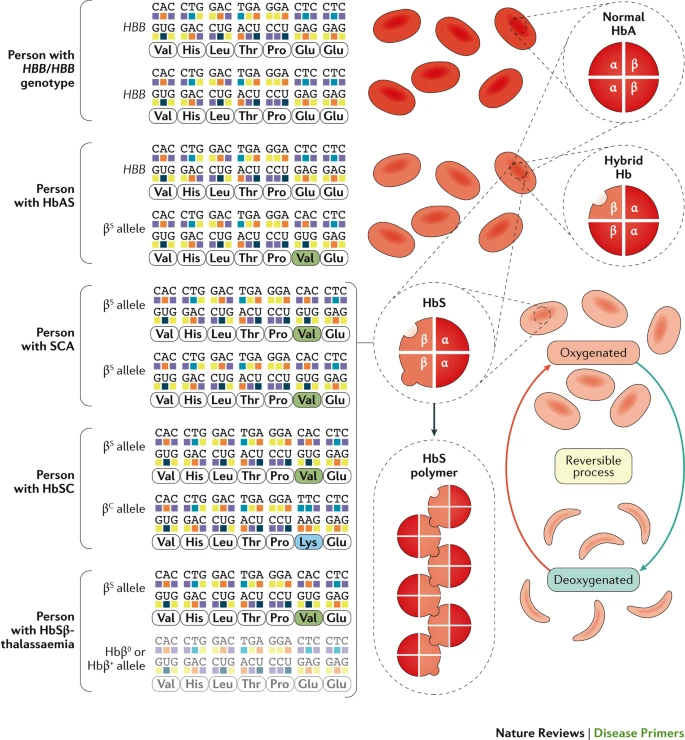

We will be working with only one sample from the dataset deposited by the authors of [Moani et al. 2023, Nature Communications, Non-viral DNA delivery and TALEN editing correct the sickle cell mutation in hematopoietic stem cells](https://www.nature.com/articles/s41467-024-49353-3). The authors report a preclinical proof of concept of an ex vivo gene therapy approach that leverages a TALE nuclease (TALEN) and a DNA repair template to previsely correct the the $\beta$ gene responsible for sickle cell disease.

The data is available on [SRA](https://trace.ncbi.nlm.nih.gov/Traces/?study=SRP510596).

We are asking a very simple question, how does the sample ("mock") with sickle-cell disease look lik. We would like to verify if the sample indeed has the A>T mutation at the HBB locus.

# Installing pysradb

[pysradb](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6505635/) is a python [pacakge](https://github.com/saketkc/pysradb) that can retrieve metadata associated with a sequencing dataset that has been deposited to a public sequencing database such as [SRA](https://www.ncbi.nlm.nih.gov/sra) or [ENA](https://www.ebi.ac.uk/ena/browser/)

In [3]:
pip install pysradb

  Preparing metadata (setup.py) ... done
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.0/171.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 51.8 MB/s eta 0:00:00
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Created wheel for requests-ftp: filename=requests_ftp-0.3.1-py3-none-any.whl size=8164 sha256=17f921e8505480ab509d37f84275d60bf8e39828f2af0534583b3acfe534f8de
  Stored in directory: /root/.cache/pip/wheels/3a/79/dc/f819d2c2e089c0d624dd14a08eccc74e3a7491469d328b72f1
Successfully built requests-ftp


In [4]:
from pysradb import SRAweb
db = SRAweb()
df = db.sra_metadata("SRP510596", detailed=True)

/usr/local/lib/python3.10/site-packages/pysradb/utils.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
df.to_csv("metadata.csv", index=False)
df

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,dev_stage,health_state,ethnicity,population,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
0,SRR29220215,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24739731,p53 exome of Human: in vivo HSPC Edited,p53 exome of Human: in vivo HSPC Edited,9606,Homo sapiens,9015833877_2,AMPLICON,...,<NA>,<NA>,Hispanic,Mouse 04,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/015...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/015...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
1,SRR29220216,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24739730,p53 exome of Human: in vivo HSPC Edited,p53 exome of Human: in vivo HSPC Edited,9606,Homo sapiens,9015833877_1,AMPLICON,...,<NA>,<NA>,Hispanic,Mouse 04,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/016...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/016...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
2,SRR29220217,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24739729,p53 exome of Human: in vivo HSPC Edited,p53 exome of Human: in vivo HSPC Edited,9606,Homo sapiens,9015833876_2,AMPLICON,...,<NA>,<NA>,Hispanic,Mouse 03,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/017...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/017...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
3,SRR29220218,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24739728,p53 exome of Human: in vivo HSPC Edited,p53 exome of Human: in vivo HSPC Edited,9606,Homo sapiens,9015833876_1,AMPLICON,...,<NA>,<NA>,Hispanic,Mouse 03,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/018...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/018...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
4,SRR29220219,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24739727,p53 exome of Human: in vivo HSPC Edited,p53 exome of Human: in vivo HSPC Edited,9606,Homo sapiens,9015833875_2,AMPLICON,...,<NA>,<NA>,Hispanic,Mouse 02,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/019...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/019...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,SRR29275380,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792722,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,9606,Homo sapiens,SCD1-Mock-1,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/080...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/080...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
90,SRR29275381,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792721,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,9606,Homo sapiens,SCD13-i53BCLXL-2,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/081...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/081...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
91,SRR29275382,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792720,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,9606,Homo sapiens,SCD13-i53BCLXL-1,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/082...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/082...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR29

In [6]:
df_non_rna = df.loc[df["library_strategy"]!="RNA-Seq"].sort_values(by=["experiment_desc", "isolate"]).reset_index(drop=True)
df_non_rna

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,dev_stage,health_state,ethnicity,population,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
0,SRR29275381,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792721,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,9606,Homo sapiens,SCD13-i53BCLXL-2,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/081...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/081...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
1,SRR29275382,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792720,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,9606,Homo sapiens,SCD13-i53BCLXL-1,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/082...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/082...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
2,SRR29275377,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792725,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,9606,Homo sapiens,SCD3-i53BCLXL-2,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/077...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/077...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
3,SRR29275378,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792724,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,9606,Homo sapiens,SCD3-i53BCLXL-1,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/078...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/078...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
4,SRR29275375,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792727,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,CAST-seq on HBB of Human: in vitro HSPC Hbs Ed...,9606,Homo sapiens,SCD5-i53BCLXL-2,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/075...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/075...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SRR29220224,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24739722,p53 exome of Human: in vivo HSPC Edited,p53 exome of Human: in vivo HSPC Edited,9606,Homo sapiens,9015833889_1,AMPLICON,...,<NA>,<NA>,Hispanic,Mouse 10,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/024...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/024...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
60,SRR29220225,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24739721,p53 exome of Human: in vivo HSPC Edited,p53 exome of Human: in vivo HSPC Edited,9606,Homo sapiens,9015833888_2,AMPLICON,...,<NA>,<NA>,Hispanic,Mouse 09,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/025...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/025...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
61,SRR29220226,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24739720,p53 exome of Human: in vivo HSPC Edited,p53 exome of Human: in vivo HSPC Edited,9606,Homo sapiens,9015833888_1,AMPLICON,...,<NA>,<NA>,Hispanic,Mouse 09,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/026...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/026...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.

In [7]:
df_non_rna["experiment_desc"].value_counts()

,count
experiment_desc,
p53 exome of Human: in vitro HSPC Edited,28
p53 exome of Human: in vivo HSPC Edited,12
p53 exome of Human: in vitro HSPC Mock,10
CAST-seq on HBB of Human: in vitro HSPC Hbs Edited,6
CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,4
SureSelect sequencing of edited healthy donors,4


# Downloading the sickle cell sequences

There are a lot of datasets in this study. We will just analyze the "mock" sample, which is a sample with

In [8]:
mocks = df_non_rna[df_non_rna["experiment_desc"] == "CAST-seq on HBB of Human: in vitro HSPC Hbs Mock"]
mocks

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,dev_stage,health_state,ethnicity,population,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
6,SRR29275383,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792719,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,9606,Homo sapiens,SCD10-Mock-2,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
7,SRR29275384,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792718,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,9606,Homo sapiens,SCD10-Mock-1,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/084...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/084...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
8,SRR29275379,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792723,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,9606,Homo sapiens,SCD1-Mock-2,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/079...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/079...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...
9,SRR29275380,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792722,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,9606,Homo sapiens,SCD1-Mock-1,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/080...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/080...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...


In [9]:
library_name_to_download = "SCD10-Mock-2"
mocks_to_download = mocks[mocks["library_name"] == library_name_to_download]
mocks_to_download

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,dev_stage,health_state,ethnicity,population,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
6,SRR29275383,SRP510596,Non-viral DNA delivery and TALEN editing corre...,SRX24792719,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,CAST-seq on HBB of Human: in vitro HSPC Hbs Mock,9606,Homo sapiens,SCD10-Mock-2,OTHER,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083...,<NA>,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR292/...


In [10]:
mocks_to_download["ena_fastq_http_1"].values

array(['http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083/SRR29275383/SRR29275383_1.fastq.gz'],
      dtype=object)

Let's download the paired end data for this sample

In [11]:
!wget -c -O SCD10-Mock-2_R1.fastq.gz http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083/SRR29275383/SRR29275383_1.fastq.gz
!wget -c -O SCD10-Mock-2_R2.fastq.gz http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083/SRR29275383/SRR29275383_2.fastq.gz

--2024-08-23 06:10:30--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083/SRR29275383/SRR29275383_1.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73498866 (70M) [application/x-gzip]
Saving to: ‘SCD10-Mock-2_R1.fastq.gz’

SCD10-Mock-2_R1.fas 100%[===================>]  70.09M   674KB/s    in 1m 50s  

2024-08-23 06:12:21 (654 KB/s) - ‘SCD10-Mock-2_R1.fastq.gz’ saved [73498866/73498866]

--2024-08-23 06:12:21--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR292/083/SRR29275383/SRR29275383_2.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67254603 (64M) [application/x-gzip]
Saving to: ‘SCD10-Mock-2_R2.fastq.gz’

SCD10-Mock-2_R2.fas 100%[===================>]  64.14M  

# Exploring quality of data

Once we obtain any sequencing dataset, we should


In [12]:
!mamba install -c bioconda fastqc fastp


Looking for: ['fastqc', 'fastp']

[+] 0.0s
bioconda/linux-64 ..  ⣾  [+] 0.1s
bioconda/linux-64 ..  ⣾  bioconda/linux-64 (check zst)                     
[+] 0.0s
bioconda/noarch (c..  ⣾  bioconda/noarch (check zst)                       
[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  
bioconda/linux-64     ⣾  
bioconda/noarch       ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  
bioconda/linux-64     ⣾  
bioconda/noarch       ⣾  [+] 0.2s
conda-forge/linux-64   1%
conda-forge/noarch     1%
bioconda/linux-64     ⣾  
bioconda/noarch       ⣾  [+] 0.3s
conda-forge/linux-64   1%
conda-forge/noarch    11%
bioconda/linux-64     ⣾  
bioconda/noarch       ⣾  [+] 0.4s
conda-forge/linux-64   6%
conda-forge/noarch    22%
bioconda/linux-64     ⣾  
bioconda/noarch       ⣾  [+] 0.5s
conda-forge/linux-64   6%
conda-forge/noarch    22%
bioconda/linux-64     ⣾  
bioconda/noarch       ⣾  [+] 0.6s
conda-forge/linux-64  10%
conda-forge/noarch    32%
bioconda/linux-64     ⣾  
bi

# Quick metrics

Before doing any pre-processing it is always a good idea to get a "sense" of your data.

- What is the size of your fastq.gz files?
- How many reads does your data have?
- Is your data single-end or paired-end?
- What is the length of reads? Are R1 and R2 read lengths same?
- What technology was used to generate the data? (Not only instrument, but the assay)

### What is the size of your fastq.gz files?

In [13]:
ls -ltrha *.fastq.gz

-rw-r--r-- 1 root root 71M Jun  5 22:37 SCD10-Mock-2_R1.fastq.gz
-rw-r--r-- 1 root root 65M Jun  5 22:37 SCD10-Mock-2_R2.fastq.gz


### How many reads does your data have?


In [14]:
!apt install bc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bc
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 87.6 kB of archives.
After this operation, 220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 bc amd64 1.07.1-3build1 [87.6 kB]
Fetched 87.6 kB in 1s (124 kB/s)
Selecting previously unselected package bc.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../bc_1.07.1-3build1_amd64.deb ...
Unpacking bc (1.07.1-3build1) ...
Setting up bc (1.07.1-3build1) ...
Processing triggers for man-db (2.10.2-1) ...


In [15]:
!echo $(zcat SCD10-Mock-2_R1.fastq.gz|wc -l)/4|bc


944098


In [16]:
!echo $(zcat SCD10-Mock-2_R2.fastq.gz |wc -l)/4|bc


944098


### What is the length of reads? Are R1 and R2 read lengths same?


In [17]:
!zcat SCD10-Mock-2_R1.fastq.gz | head -n 2

@SRR29275383.1 NB551576:151:H22JYAFX3:1:11101:5824:1055/1
AACAANAATCTTAAAATAAAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCATTAGATCGGAAGAGCACACGTCTT


In [18]:
!zcat SCD10-Mock-2_R1.fastq.gz  | head -n 2  | tail -n 1 | wc -c

152


In [19]:
!zcat SCD10-Mock-2_R2.fastq.gz  | head -n 2  | tail -n 1 | wc -c

152


# Quality control checks

Before we do any pre-processing it is always a good idea to take a quick look the quality score description. We will run [FastQC](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/) to run quality checks for our sequencing data


In [20]:
!fastqc SCD10-Mock-2_R1.fastq.gz SCD10-Mock-2_R2.fastq.gz

application/gzip
application/gzip
Started analysis of SCD10-Mock-2_R1.fastq.gz
Approx 5% complete for SCD10-Mock-2_R1.fastq.gz
Approx 10% complete for SCD10-Mock-2_R1.fastq.gz
Approx 15% complete for SCD10-Mock-2_R1.fastq.gz
Approx 20% complete for SCD10-Mock-2_R1.fastq.gz
Approx 25% complete for SCD10-Mock-2_R1.fastq.gz
Approx 30% complete for SCD10-Mock-2_R1.fastq.gz
Approx 35% complete for SCD10-Mock-2_R1.fastq.gz
Approx 40% complete for SCD10-Mock-2_R1.fastq.gz
Approx 45% complete for SCD10-Mock-2_R1.fastq.gz
Approx 50% complete for SCD10-Mock-2_R1.fastq.gz
Approx 55% complete for SCD10-Mock-2_R1.fastq.gz
Approx 60% complete for SCD10-Mock-2_R1.fastq.gz
Approx 65% complete for SCD10-Mock-2_R1.fastq.gz
Approx 70% complete for SCD10-Mock-2_R1.fastq.gz
Approx 75% complete for SCD10-Mock-2_R1.fastq.gz
Approx 80% complete for SCD10-Mock-2_R1.fastq.gz
Approx 85% complete for SCD10-Mock-2_R1.fastq.gz
Approx 90% complete for SCD10-Mock-2_R1.fastq.gz
Approx 95% complete for SCD10-Mock-2_R1.

In [21]:
!multiqc .


/// ]8;id=602679;https://multiqc.info\MultiQC]8;;\ 🔍 v1.24.1

       file_search | Search path: /content
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 29/29  
            fastqc | Found 2 reports
     write_results | Data        : multiqc_data
     write_results | Report      : multiqc_report.html
           multiqc | MultiQC complete


Download "multiqc_report.html" from the left document panel. You will find multiple metrics reported for both the read files. You will find the following adapter plot:

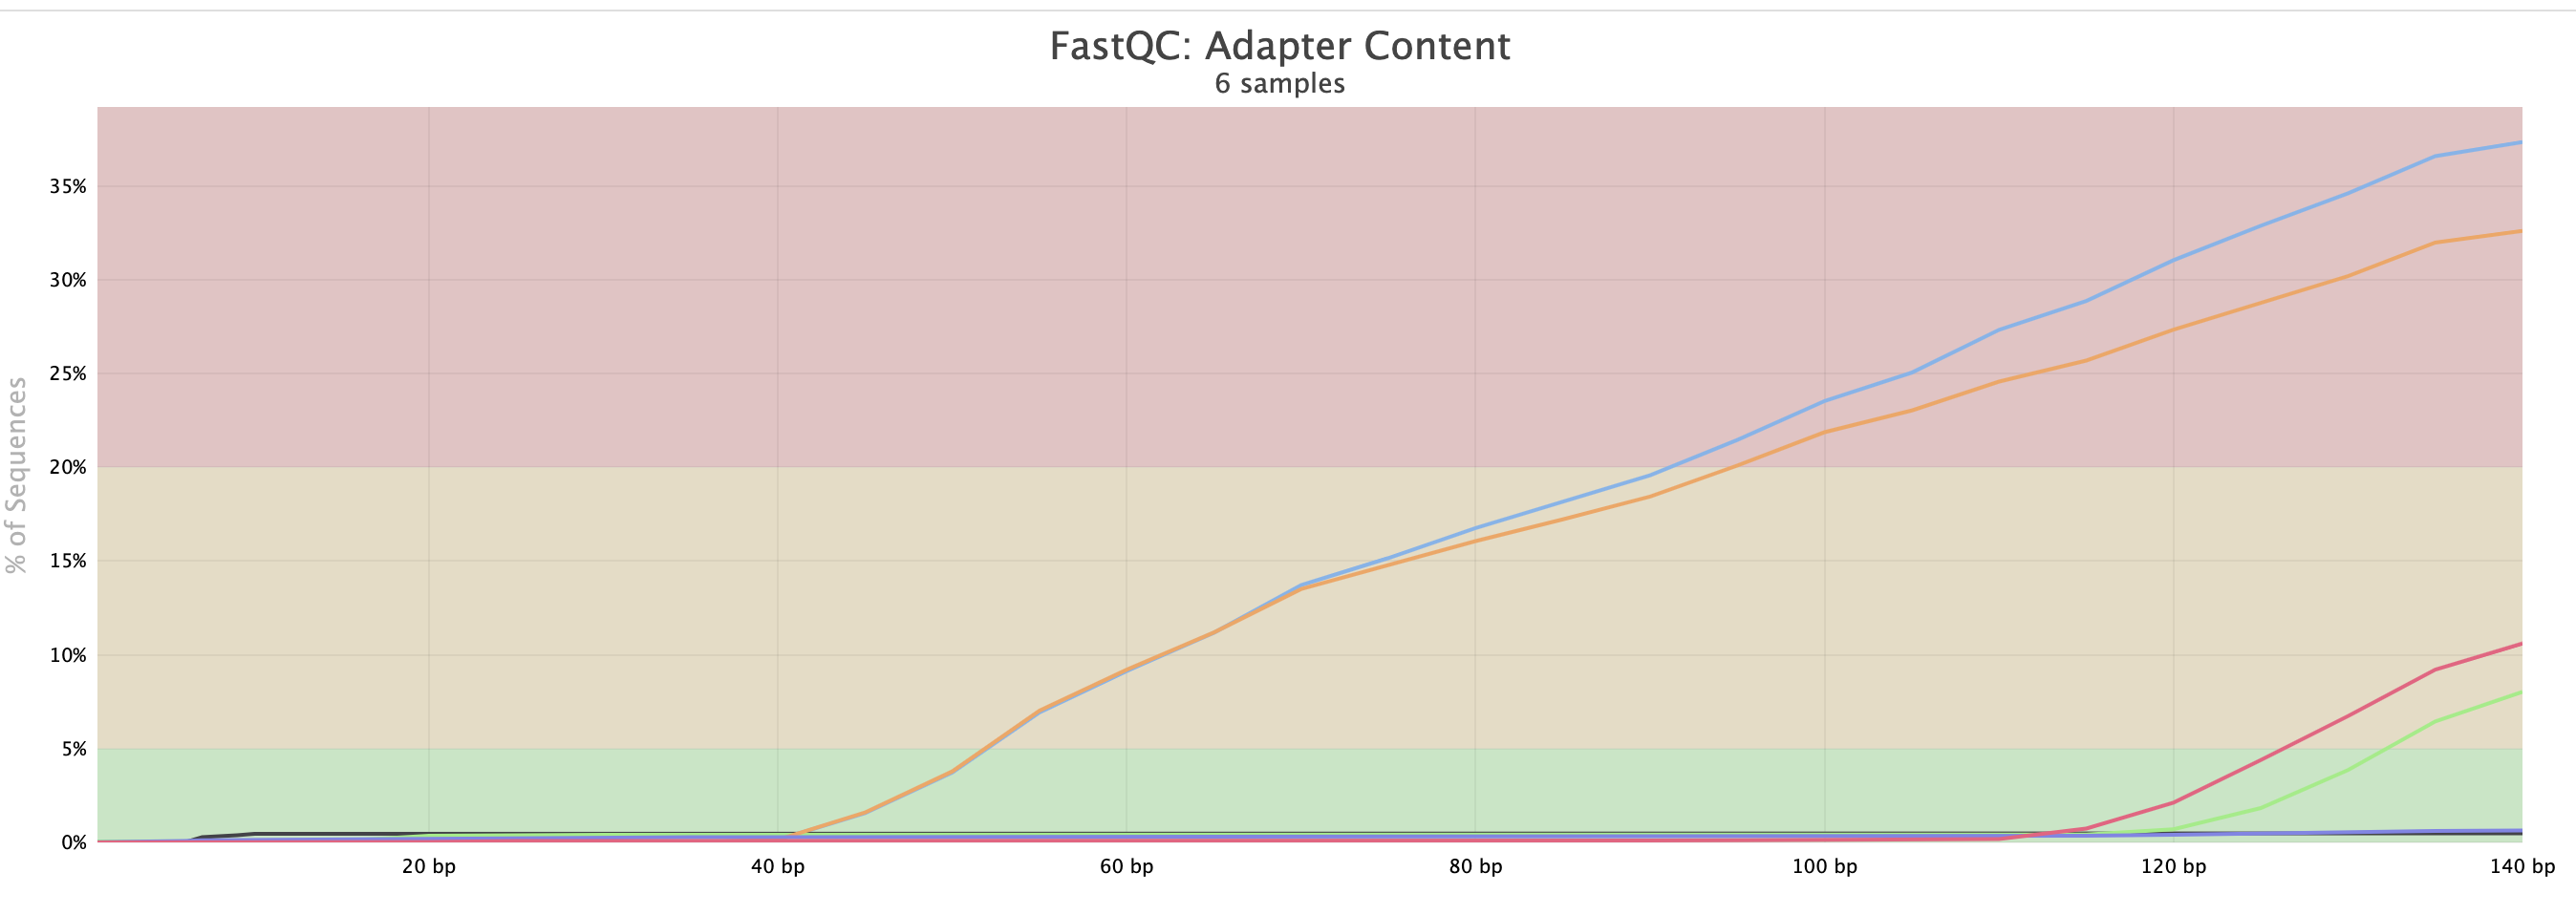


What is going on with the adapters?

# Removing adapters

Often illumina sequencing data needs to be trimmed to remove adapter sequences. But why do we waste sequencing efforts at sequencing the adapters?



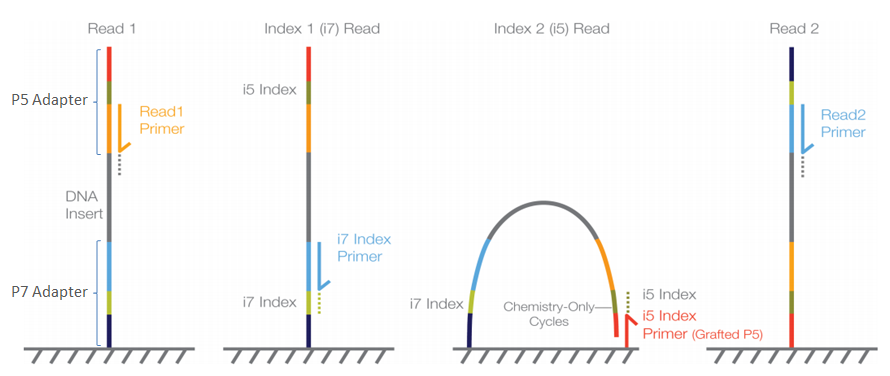


The diagram below shows sites of primer annealing at each stage of sequencing run: Read 1, Index 1, Index 2 and Read 2. You can ignore Index 1 and Index 2, but very briefly these are reads that allow multiple samples to be pooled and sequenced together. The example below is of dual-indexed sequencing (i5 and i7). You can read about indexing details [here](https://support-docs.illumina.com/SHARE/IndexedSeq/Content/SHARE/IndexedSequencing/IndexedSeqIntro.htm)



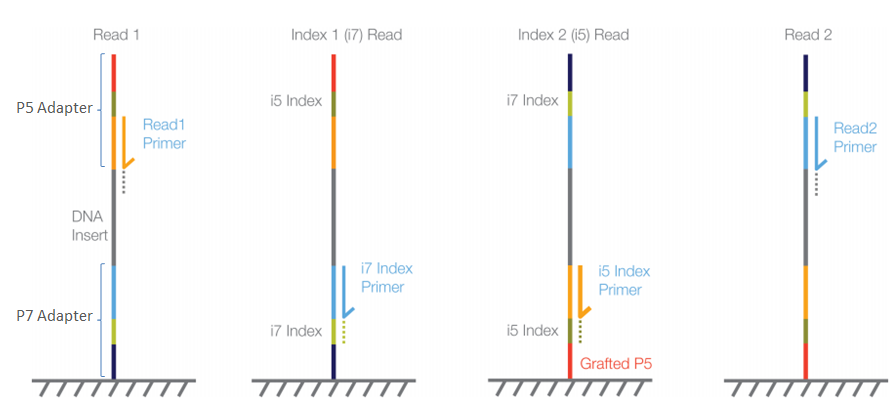

Consider the reads R1 and R2 in a typicall illumina flowcell as shown below. Our goal is to sequence the "DNA insert" in greay. In both Reads 1 and 2, the sequencing primer anneals to the DNA insert upstream of it. Sequencing begins at base 1 of the DNA insert and hence 5' adapters are usually not sequenced. Ideally, if the DNA insert sequence is long enough, the sequencing adapters at the 3'end will not get sequenced. But if the insert size is smaller than the read length, the adapters will also get sequenced. These adapter sequences are "fixed" sequences , and ideally we do not want them to be part of our reads because they will not match to the sequences in our reference genome thereby making the alignment step less accurate. So we would like to remove these.



## Adapter trimming with fastp

We will use [fastp](https://github.com/OpenGene/fastp) published in [2018](https://academic.oup.com/bioinformatics/article/34/17/i884/5093234) for trimming adapters. `fastp` is smart enough to figure out the adapters, trim them and remove low quality score reads.

fastp performs two operations 1) it trims the low quality bases and 2) it trims adapters. If in this operation, the read length falls below a certain threshold, these reads are discarded. Read the documentation of [fastp](https://github.com/OpenGene/fastp) to figure out what the defaults are.



In [22]:
!filename="SCD10-Mock-2" && fastp --in1 "$filename"_R1.fastq.gz  --out1  "$filename"_R1_trimmed.fastq.gz  --in2 "$filename"_R2.fastq.gz --out2 "$filename"_R2_trimmed.fastq.gz  --html  "$filename"_trimming_report.html --json   "$filename"_trimming_report.json


Read1 before filtering:
total reads: 944098
total bases: 142275275
Q20 bases: 109029970(76.6331%)
Q30 bases: 85696830(60.2331%)

Read2 before filtering:
total reads: 944098
total bases: 142052189
Q20 bases: 114341656(80.4927%)
Q30 bases: 92208881(64.912%)

Read1 after filtering:
total reads: 763620
total bases: 112701725
Q20 bases: 92833505(82.371%)
Q30 bases: 74247397(65.8796%)

Read2 after filtering:
total reads: 763620
total bases: 112506969
Q20 bases: 95075131(84.506%)
Q30 bases: 77379630(68.7776%)

Filtering result:
reads passed filter: 1527240
reads failed due to low quality: 360452
reads failed due to too many N: 504
reads failed due to too short: 0
reads with adapter trimmed: 122360
bases trimmed due to adapters: 4799845

Duplication rate: 0.013452%

Insert size peak (evaluated by paired-end reads): 209

JSON report: SCD10-Mock-2_trimming_report.json
HTML report: SCD10-Mock-2_trimming_report.html

fastp --in1 SCD10-Mock-2_R1.fastq.gz --out1 SCD10-Mock-2_R1_trimmed.fastq.gz --in

# Mapping

Now that we have done initial preprocessing, we are ready to map data to human genome reference.

In an ideal world we will map the data to the entire genome, but since we are working with Google colab with memory restirctions, we will just map all the data to chromosome 11 as HBB gene is in chromosome 11. While this is not incorrect, it is also not the most appropriate mapping strategy - you should in all scenarios map to the entire human genome.

We can download the human genome from UCSC:

- genome: https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/
- chromosome wise: https://hgdownload.soe.ucsc.edu/goldenPath/hg38/chromosomes

In [23]:
#!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
!wget https://hgdownload.cse.ucsc.edu/goldenpath/hg38/chromosomes/chr11.fa.gz

--2024-08-23 06:38:59--  https://hgdownload.cse.ucsc.edu/goldenpath/hg38/chromosomes/chr11.fa.gz
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43168911 (41M) [application/x-gzip]
Saving to: ‘chr11.fa.gz’

chr11.fa.gz         100%[===================>]  41.17M  42.2MB/s    in 1.0s    

2024-08-23 06:39:01 (42.2 MB/s) - ‘chr11.fa.gz’ saved [43168911/43168911]



In [24]:
#!gunzip hg38.fa.gz
!gunzip chr11.fa.gz

# Generate the burrows wheeler index

To map our reads to the human genome, we will make use of burrows wheeler aligner [bwa](https://github.com/lh3/bwa/). You can read the original paper from bwa authors [here](https://academic.oup.com/bioinformatics/article/25/14/1754/225615).



In [25]:
!mamba install -c bioconda bwa


Looking for: ['bwa']

[+] 0.0s
bioconda/linux-64  ⣾  [+] 0.1s
bioconda/linux-64     ⣾  
bioconda/noarch       ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  bioconda/noarch                                               No change
bioconda/linux-64                                             No change
[+] 0.2s
conda-forge/linux-64   1%
conda-forge/noarch     1%[+] 0.3s
conda-forge/linux-64   9%
conda-forge/noarch     5%[+] 0.4s
conda-forge/linux-64  14%
conda-forge/noarch    25%[+] 0.5s
conda-forge/linux-64  18%
conda-forge/noarch    35%[+] 0.6s
conda-forge/linux-64  22%
conda-forge/noarch    44%[+] 0.7s
conda-forge/linux-64  27%
conda-forge/noarch    54%[+] 0.8s
conda-forge/linux-64  31%
conda-forge/noarch    54%[+] 0.9s
conda-forge/linux-64  31%
conda-forge/noarch    64%[+] 1.0s
conda-forge/linux-64  36%
conda-forge/noarch    75%[+] 1.1s
conda-forge/linux-64  40%
conda-forge/noarch    75%[+] 1.2s
conda-forge/linux-64  40%
conda-forge/noarch    85%[+] 1.3s
conda-forge/linux-64 

In [26]:
!bwa index chr11.fa

[bwa_index] Pack FASTA... 1.24 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=270173244, availableWord=31010396
[BWTIncConstructFromPacked] 10 iterations done. 51153116 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 94501340 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 133025356 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 167261564 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 197686764 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 224724716 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 248752076 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 270103628 characters processed.
[bwt_gen] Finished constructing BWT in 81 iterations.
[bwa_index] 125.17 seconds elapse.
[bwa_index] Update BWT... 1.71 sec
[bwa_index] Pack forward-only FASTA... 0.87 sec
[bwa_index] Construct SA from BWT and Occ.

# Perform alignment and create sam and bam files

In [27]:
!mamba install -c bioconda samtools


Looking for: ['samtools']

bioconda/linux-64                                           Using cache
bioconda/noarch                                             Using cache
conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  Updating specs:

   - samtools
   - ca-certificates
   - certifi
   - openssl


  Package      Version  Build            Channel           Size
─────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────

  + htslib        1.20  h5efdd21_2       bioconda           3MB
  + samtools      1.20  h50ea8bc_1       bioconda         481kB

  Upgrade:
─────────────────────────────────────────────────────────────────

  - ncurses        6.4  h59595ed_2       con

In [28]:
! filename="SCD10-Mock-2" && bwa mem -t 32  chr11.fa "$filename"_R1_trimmed.fastq.gz "$filename"_R2_trimmed.fastq.gz > "$filename".sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 1527240 sequences (225208694 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (87, 563449, 89, 514)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (1, 1, 2)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 4)
[M::mem_pestat] mean and std.dev: (1.62, 0.80)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 5)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (96, 130, 160)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 288)
[M::mem_pestat] mean and std.dev: (125.88, 41.68)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 352)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (7386, 7387, 7388)
[M::mem_pestat] low and high boundaries

In [29]:
! filename="SCD10-Mock-2" && head "$filename".sam

@SQ	SN:chr11	LN:135086622
@HD	VN:1.5	SO:unsorted	GO:query
@PG	ID:bwa	PN:bwa	VN:0.7.18-r1243-dirty	CL:bwa mem -t 32 chr11.fa SCD10-Mock-2_R1_trimmed.fastq.gz SCD10-Mock-2_R2_trimmed.fastq.gz
SRR29275383.1	83	chr11	5226892	60	24S108M19S	=	5226895	-105	AAGACGTGTGCTCTTCCGATCTAATGGTCTCCTTAAACCTGTCTTGTAACCTTGATACCAACCTGCCCAGGGCCTCACCACCAACTTCATCCACGTTCACCTTGCCCCACAGGGCAGTAACGGCAGACTTCTTTATTTTAAGATTNTTGTT	/A</EEEAEEEEEAA<<A6AA6/<<E<AAA<A<<<AAEEEEA<EEAAEAEEEEAAA<EEE//EEEEEEEEEEAE<EEEEEEEEAE6EEEEEAEEEEEEEEE6AEEEEEEEEEEEEEAAAEEEEEEEEEEEEEEE//AEEE/E/EA#AA//A	NM:i:0	MD:Z:108	MC:Z:5S104M42S	MQ:i:60	AS:i:108	XS:i:60
SRR29275383.1	163	chr11	5226895	60	5S104M42S	=	5226892	105	AAAACTCTCCTTAAACCAGTCTAGTAACCTTGATACCAACCTGCCCAGGGCCTCACCACCAACTTCATCCACGTTCACCTTGCCCCACAGGGCAGTAACGGCAGACTTCAGTCCCTTAAGCGGAGCCCTAGATCGGAAGAGCGTCGTGTAT	AAA//AAEEEEEEEEAEEEEEE/EEEEEEEEEEEEEEEEEEEEAEAEEEEEAEEEEEAEEEEEEEEEEEEAAEEEA<EAEA/EEEEEEE/<A<AEEA<AA<EE<<E/AE/AAAAEAA<//6</AEA</<66<<<6</<A6A<<<AAE6A<<	NM:i:2	MD:Z:12T4T86	MC:Z:24

You can see the format of SAM in Slide 50 of the [previous lecture](https://docs.google.com/presentation/d/1TmLXz_KdO9wolXwR6V7-Evz80sqw9JNzgnBqDXd__No/edit#slide=id.g2f4a63ec865_0_273).

In [30]:
! filename="SCD10-Mock-2" && samtools view -bS -o "$filename"_unsorted.bam "$filename".sam

In [31]:
!filename="SCD10-Mock-2" && samtools sort -o "$filename".bam "$filename"_unsorted.bam

In [33]:
! filename="SCD10-Mock-2" && samtools index "$filename".bam

In [34]:
! ls -ltrha

total 1.5G
-rw-r--r-- 1 root root 132M Jan 24  2014 chr11.fa
-rw-r--r-- 1 root root  71M Jun  5 22:37 SCD10-Mock-2_R1.fastq.gz
-rw-r--r-- 1 root root  65M Jun  5 22:37 SCD10-Mock-2_R2.fastq.gz
drwxr-xr-x 4 root root 4.0K Aug 21 13:28 .config
drwxr-xr-x 1 root root 4.0K Aug 21 13:28 sample_data
drwxr-xr-x 1 root root 4.0K Aug 23 05:43 ..
-rw-r--r-- 1 root root  23K Aug 23 05:48 condacolab_install.log
-rw-r--r-- 1 root root 130K Aug 23 06:03 metadata.csv
-rw-r--r-- 1 root root 624K Aug 23 06:24 SCD10-Mock-2_R1_fastqc.zip
-rw-r--r-- 1 root root 676K Aug 23 06:24 SCD10-Mock-2_R1_fastqc.html
-rw-r--r-- 1 root root 723K Aug 23 06:24 SCD10-Mock-2_R2_fastqc.zip
-rw-r--r-- 1 root root 738K Aug 23 06:24 SCD10-Mock-2_R2_fastqc.html
drwxr-xr-x 2 root root 4.0K Aug 23 06:24 multiqc_data
-rw-r--r-- 1 root root 4.5M Aug 23 06:24 multiqc_report.html
-rw-r--r-- 1 root root 128K Aug 23 06:37 SCD10-Mock-2_trimming_report.json
-rw-r--r-- 1 root root 475K Aug 23 06:37 SCD10-Mock-2_trimming_report.html
-rw-

We could have avoided creating so many files by 'piping' the output of one command into another. Piping saves a) time and b) space.

In [35]:
# piping shortcut

# ! filename="SCD10-Mock-2" && bwa mem -t 32  chr11.fa "$filename"_R1_trimmed.fastq.gz "$filename"_R2_trimmed.fastq.gz | samtools sort -o "$filename".bam && samtools index "$filename".bam && samtools view -F 2048 -bo  "$filename"_no_secondary.bam  "$filename".bam  && samtools index "$filename".bam

# Visualization

Recall why we started this excercise. We were interested in whether the "mock" samples are really sicle cell disease samples. To detect this, we need to look into the mutation data for HBB gene and see if one of the bases appears mutated.


To visualize reads mapped to genome, we will use [igv](https://igv.org/). You can download IGV as a desktop application (recommended) and use it to visualize the alignment and mutations.

To make it easy to visualize it here (in colab), we will downsample the bam so that it retains only 5% of original reads:

In [36]:
!samtools view -s 0.05 -b SCD10-Mock-2.bam | samtools sort -o SCD10-Mock-2_sample05.bam && samtools index SCD10-Mock-2_sample05.bam

In [37]:
import igv_notebook
igv_notebook.init()

b = igv_notebook.Browser(
    {
        "genome": "hg38",
        "locus": "chr11:5,226,929-5,227,087"
    }
)


b.load_track(
    {
        "name": "SCD10-Mock-2_sample05",
        "path": "SCD10-Mock-2_sample05.bam",
        "indexPath": "SCD10-Mock-2_sample05.bam.bai",
        "format": "bam",
        "type": "alignment"
    })


b.zoom_in()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exercise

1. We chose one mock sample. Can you go back and try this with a different sample?

2. How would you verify that the therapy has indeded worked? (you might not be able to do this analysis completely on colab)



In [ ]:
!pip install watermark
!watermark

In [ ]:
print(f"Total run time {monotonic() - start_time} seconds")